In [127]:
import os
import pandas as pd
import numpy as np
import sys
import os

def find_and_append_module_path():
    current_dir = os.getcwd()
    substring_to_find = 'statsfaction'
    index = current_dir.rfind(substring_to_find)
    
    if index != -1:
        # Extract the directory path up to and including the last "mypath" occurrence
        new_dir = current_dir[:index + (len(substring_to_find))]

        # Change the current working directory to the new directory
        os.chdir(new_dir)
        sys.path.append(new_dir)
        # Verify the new current directory
        print("New current directory:", os.getcwd())
    else:
        print("No 'mypath' found in the current directory")

find_and_append_module_path()
os.getcwd()


New current directory: c:\Users\Robert\Documents\Projekte\dev\statsfaction


'c:\\Users\\Robert\\Documents\\Projekte\\dev\\statsfaction'

In [128]:
from src.sport_analytics.model.predict import predict_and_explain_players, analyze_individual_ID
from src.sport_analytics.model.eval import create_polar_plot

# Import your group to analyze

In [129]:
sql_prospect = f"""
SELECT min(Age) as potential_age,* FROM  fifa WHERE  FIFA = 2024 and Age < 23 and potential > 65 and overall <84
GROUP BY ID
order by potential DESC;
"""


import pandas as pd
import sqlite3
DATABASE_PATH = "data/sport_analytics/database/football.db"
# Step 1: Establish a database connection
conn = sqlite3.connect(DATABASE_PATH)

df_prospect = pd.read_sql_query(sql_prospect, conn)

conn.close()

df_prospect.head()

,potential_age,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,FIFA,Composure,Defensive awareness
0,19.0,263578,Balde,19.0,https://cdn.sofifa.net/players/263/578/24_60.png,Spain,https://cdn.sofifa.net/flags/es.png,81.0,89.0,FC Barcelona,...,80.0,79.0,5.0,8.0,7.0,10.0,13.0,2024,64.0,72.0
1,20.0,259399,R. Højlund,20.0,https://cdn.sofifa.net/players/259/399/24_60.png,Denmark,https://cdn.sofifa.net/flags/dk.png,76.0,89.0,Manchester United,...,24.0,15.0,12.0,8.0,9.0,14.0,7.0,2024,72.0,27.0
2,21.0,258729,Gabri Veiga,21.0,https://cdn.sofifa.net/players/258/729/24_60.png,Spain,https://cdn.sofifa.net/flags/es.png,78.0,89.0,Celta de Vigo,...,73.0,60.0,13.0,14.0,13.0,6.0,9.0,2024,68.0,41.0
3,20.0,248243,E. Camavinga,20.0,https://cdn.sofifa.net/players/248/243/24_60.png,France,https://cdn.sofifa.net/flags/fr.png,82.0,89.0,Real Madrid,...,80.0,79.0,12.0,6.0,8.0,12.0,12.0,2024,82.0,75.0
4,20.0,245367,X. Simons,20.0,https://cdn.sofifa.net/players/245/367/24_60.png,Netherlands,https://cdn.sofifa.net/flags/nl.png,79.0,89.0,RB Leipzig,...,62.0,56.0,9.0,11.0,5.0,8.0,10.0,2024,78.0,60.0


In [130]:
df_prospect = pd.concat([pd.DataFrame(pd.Series({'Position':"ST",'Reactions':58, 'Stamina':45, 'Positioning':56, 'FKAccuracy':65,
       'ShortPassing':54, 'Dribbling':62, 'BallControl':60, 'ShotPower':82, 'Aggression':78,"FIFA":2024,
       'Vision':57, 'SprintSpeed':89,"Age":17,"Name":"N.Irankunda","ID":266245})).T,df_prospect])

In [131]:
df_prospect = pd.concat([pd.DataFrame(pd.Series({'Position':"ST",'Reactions':75, 'Stamina':65, 'Positioning':70, 'FKAccuracy':65,
       'ShortPassing':65, 'Dribbling':62, 'BallControl':60, 'ShotPower':82, 'Aggression':78,"FIFA":2024,
       'Vision':57, 'SprintSpeed':89,"Age":17,"Name":"N.Irankunda","ID":101})).T,df_prospect])

In [132]:
pd.Series(df_prospect.Overall/(df_prospect.Age**2)).describe()

count     3866.000000
unique     172.000000
top          0.130165
freq        87.000000
dtype: float64

## Choose a from a Set of trained models

In [133]:
import pickle

with open("./data/sport_analytics/model/Offense_trained_models.pkl", "rb") as file:
    loaded_object = pickle.load(file)

In [134]:
[i for i in loaded_object]

['Decision Tree Classifier',
 'Random Forest Classifier',
 'XGBoost Classifier general',
 'XGBoost Classifier']

In [135]:
chosen_object = loaded_object[ 'XGBoost Classifier general']
model = chosen_object['Model']
scaler = chosen_object['Scaler']
attributes = chosen_object['attributes']

print(chosen_object['Classification Report'])
print(chosen_object['AUC'])

              precision    recall  f1-score   support

       False       0.90      0.86      0.88        51
        True       0.30      0.38      0.33         8

    accuracy                           0.80        59
   macro avg       0.60      0.62      0.61        59
weighted avg       0.82      0.80      0.81        59

0.7475490196078431


# Predict entire Dataset

[19:51:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
[19:51:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


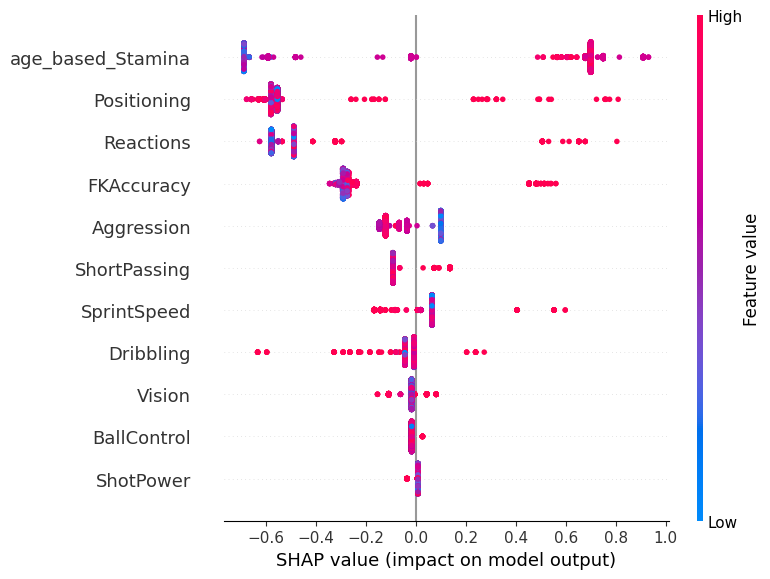

,,,Reactions,age_based_Stamina,Positioning,FKAccuracy,ShortPassing,Dribbling,BallControl,ShotPower,Aggression,Vision,SprintSpeed,summe_shap,prediction
ID,Name,FIFA,,,,,,,,,,,,,
274664,H. Diop,2024,-0.478,-1.134,-0.190,-0.394,-0.231,-0.293,-0.074,0.118,-0.493,0.072,-1.658,-4.755000,0.061686
270546,C. Delgado,2024,-0.478,-1.134,-0.190,-0.242,-0.231,-0.293,-0.074,0.118,-1.273,-3.850,0.141,-7.506000,0.061401
263194,I. Gharbi,2024,-0.478,-1.134,-0.190,-0.242,-0.231,-0.293,-0.074,0.118,-1.273,-3.850,0.141,-7.506000,0.061401
271421,D. Doué,2024,-0.478,-1.134,0.281,0.061,3.246,-11.887,-0.074,0.118,1.148,0.072,0.141,-8.506001,0.061084
248201,M. Minchev,2024,-0.478,-0.990,-0.190,-0.493,-0.231,-0.293,-0.074,0.118,-1.029,0.072,-2.381,-5.969000,0.060065
253433,F. Azeez,2024,-0.478,-1.134,-0.190,-0.189,-0.231,-0.293,-0.074,0.118,-0.493,0.072,-2.381,-5.273000,0.059705
259712,M. Diaw,2024,-0.478,-1.134,-0.190,-0.493,-0.231,-0.293,-0.074,0.118,-0.187,0.072,-2.381,-5.271000,0.059395
256046,G. Dragomir,2024,-0.478,-1.134,-0.190,-0.493,-0.231,-0.293,-0.074,0.118,-0.187,0.072,-2.381,-5.271000,0.059395
272365,S. Armstrong,2024,-0.478,-1.134,-0.190,-0.394,-0.231,-0.293,-0.074,0.118,-1.029,0.072,-1.658,-5.291000,0.058612


In [136]:
preds = predict_and_explain_players(df_prospect,attributes=attributes,model=model,scaler=scaler)
preds.tail(30)

# Analyze individual Players

In [137]:
df_prospect.head()

,Position,Reactions,Stamina,Positioning,FKAccuracy,ShortPassing,Dribbling,BallControl,ShotPower,Aggression,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Composure,Defensive awareness
0,ST,75,65,70,65,65,62,60,82,78,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,ST,58,45,56,65,54,62,60,82,78,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,"LB,RB",78.0,75.0,63.0,28.0,80.0,77.0,80.0,53.0,47.0,...,NaN,80.0,79.0,5.0,8.0,7.0,10.0,13.0,64.0,72.0
1,ST,75.0,73.0,77.0,48.0,68.0,75.0,76.0,78.0,69.0,...,NaN,24.0,15.0,12.0,8.0,9.0,14.0,7.0,72.0,27.0
2,"CM,CAM",76.0,69.0,75.0,60.0,80.0,80.0,82.0,77.0,46.0,...,NaN,73.0,60.0,13.0,14.0,13.0,6.0,9.0,68.0,41.0


[19:51:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


pred 0.3917882
[(101, 'N.Irankunda', 2024)]


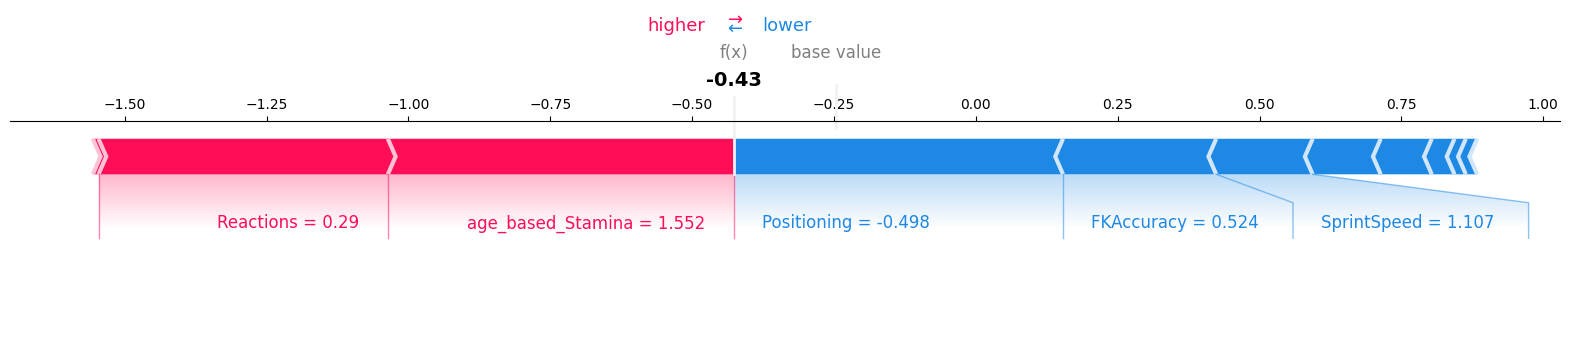

                  (101, N.Irankunda, 2024)  shap
Reactions                               75  0.51
age_based_Stamina                12.277419  0.61
Positioning                             70 -0.58
FKAccuracy                              65 -0.27
ShortPassing                            65 -0.09
Dribbling                               62 -0.04
BallControl                             60 -0.02
ShotPower                               82  0.01
Aggression                              78 -0.12
Vision                                  57 -0.02
SprintSpeed                             89 -0.17


First parameter to grid() is false, but line properties are supplied. The grid will be enabled.


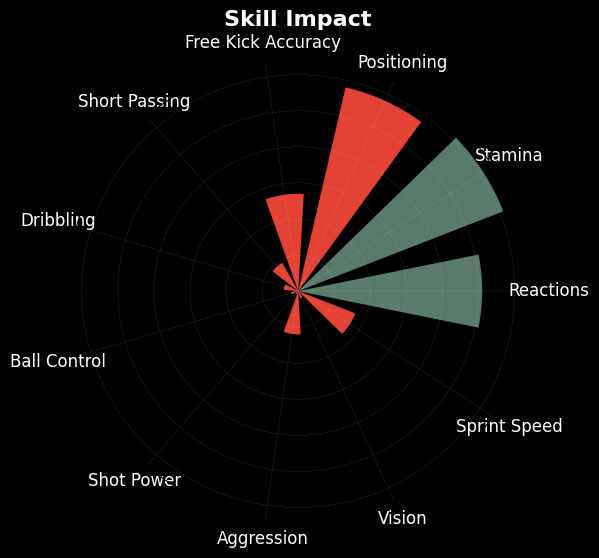

------------------------------------------------------------------------------------------------------------------------------------------------------
######################################################################################################################################################
pred 0.055359744
[(266245, 'N.Irankunda', 2024)]


[19:51:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


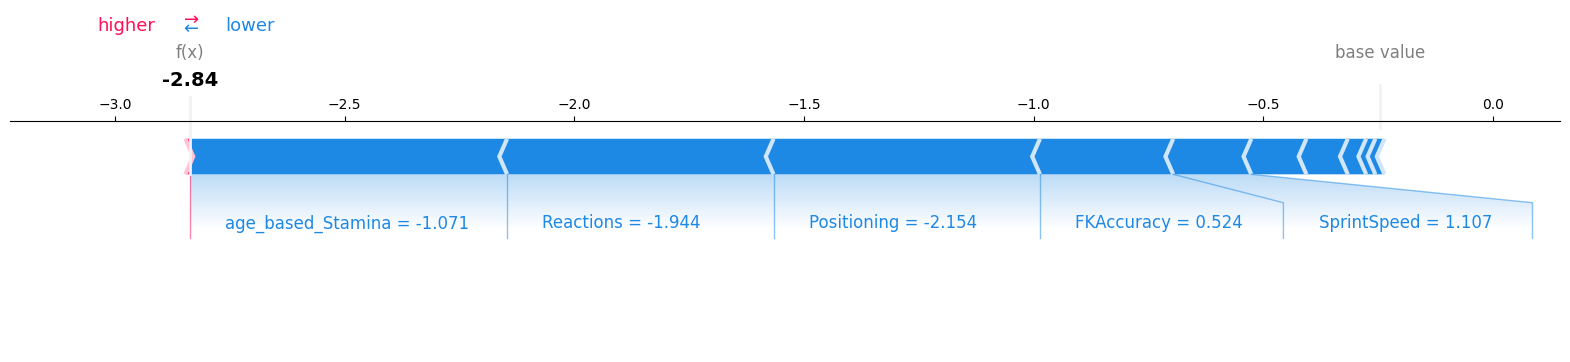

                  (266245, N.Irankunda, 2024)  shap
Reactions                                  58 -0.58
age_based_Stamina                   -7.722581 -0.69
Positioning                                56 -0.58
FKAccuracy                                 65 -0.29
ShortPassing                               54 -0.09
Dribbling                                  62 -0.04
BallControl                                60 -0.02
ShotPower                                  82  0.01
Aggression                                 78 -0.12
Vision                                     57 -0.02
SprintSpeed                                89 -0.17


First parameter to grid() is false, but line properties are supplied. The grid will be enabled.


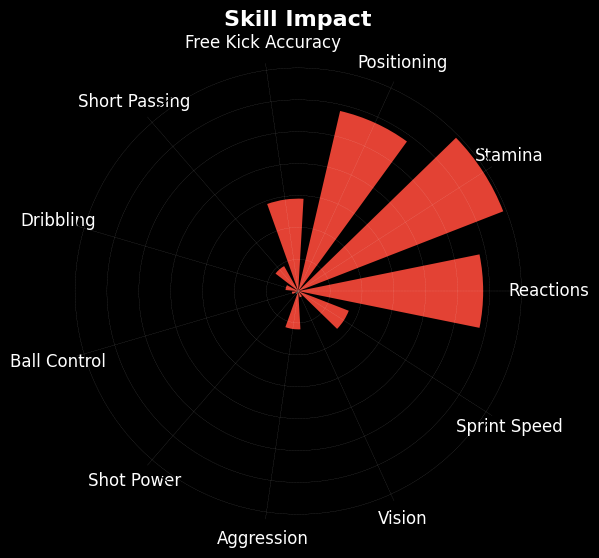

------------------------------------------------------------------------------------------------------------------------------------------------------
######################################################################################################################################################
pred 0.5509696
[(240833, 'Y. Moukoko', 2024)]


[19:51:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


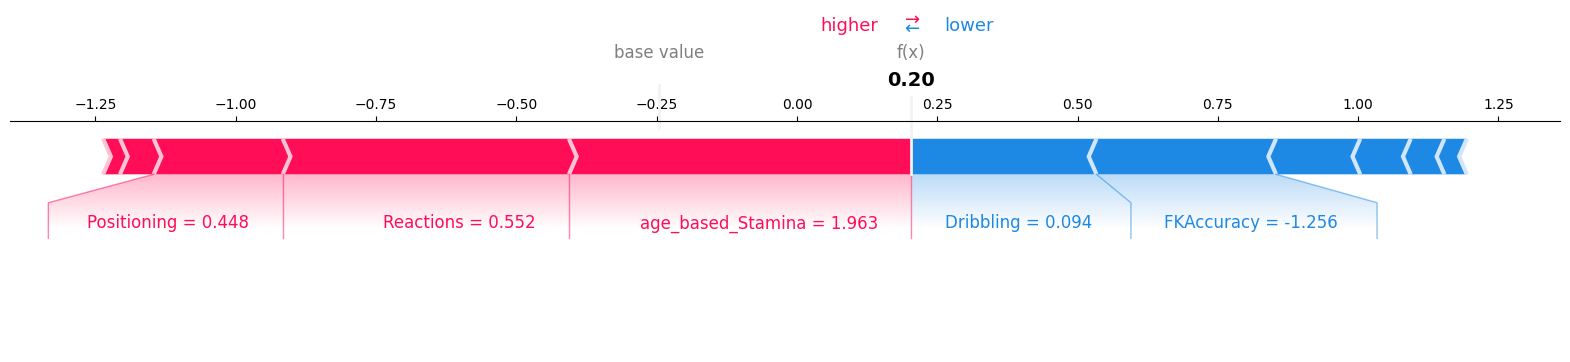

                  (240833, Y. Moukoko, 2024)  shap
Reactions                               77.0  0.51
age_based_Stamina                  15.410448  0.61
Positioning                             78.0  0.23
FKAccuracy                              42.0 -0.32
ShortPassing                            71.0 -0.09
Dribbling                               79.0 -0.33
BallControl                             81.0  0.03
ShotPower                               78.0 -0.04
Aggression                              52.0 -0.15
Vision                                  59.0 -0.06
SprintSpeed                             79.0  0.06


First parameter to grid() is false, but line properties are supplied. The grid will be enabled.


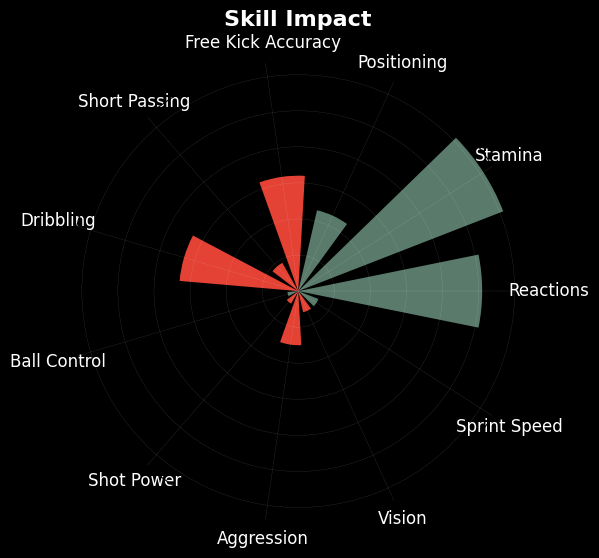

------------------------------------------------------------------------------------------------------------------------------------------------------
######################################################################################################################################################
pred 0.5420805
[(251852, 'K. Adeyemi', 2024)]


[19:51:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


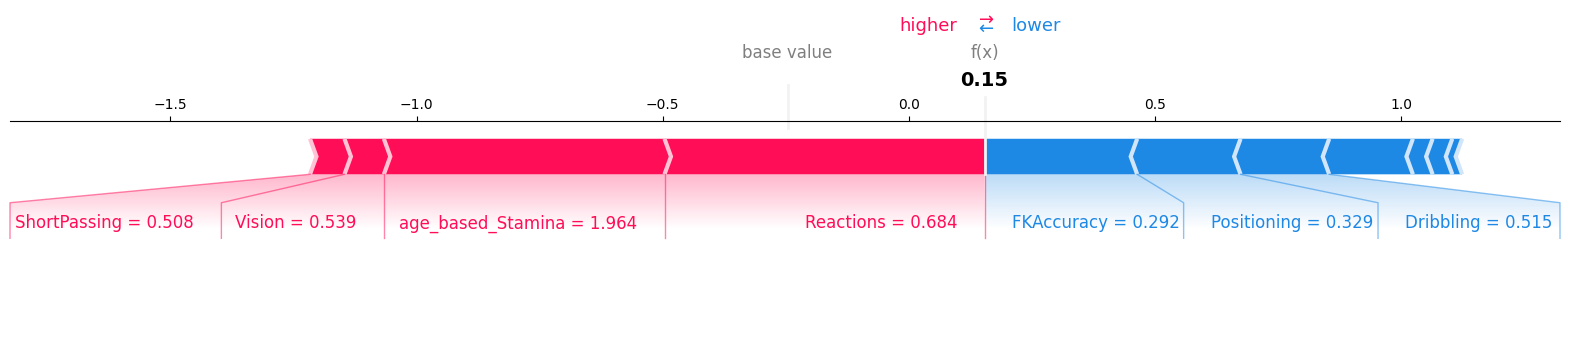

                  (251852, K. Adeyemi, 2024)  shap
Reactions                               78.0  0.65
age_based_Stamina                  15.416764  0.57
Positioning                             77.0 -0.21
FKAccuracy                              62.0 -0.31
ShortPassing                            74.0  0.07
Dribbling                               82.0 -0.18
BallControl                             79.0 -0.02
ShotPower                               76.0 -0.04
Aggression                              59.0 -0.04
Vision                                  72.0  0.08
SprintSpeed                             96.0 -0.17


First parameter to grid() is false, but line properties are supplied. The grid will be enabled.


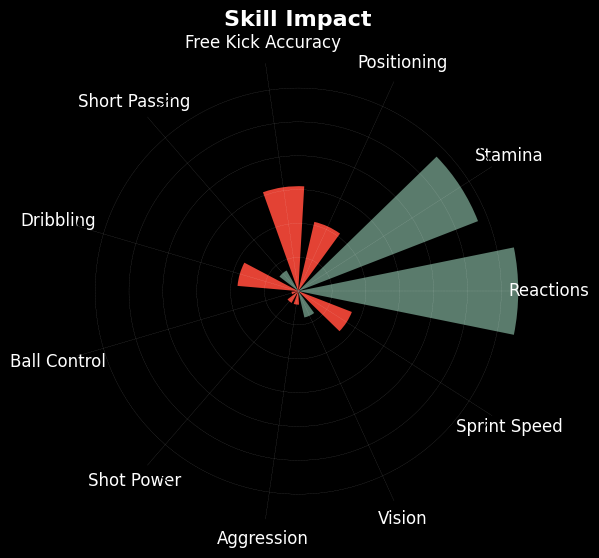

------------------------------------------------------------------------------------------------------------------------------------------------------
######################################################################################################################################################
pred 0.20051593
[(256658, 'J. Ngankam', 2024)]


[19:51:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


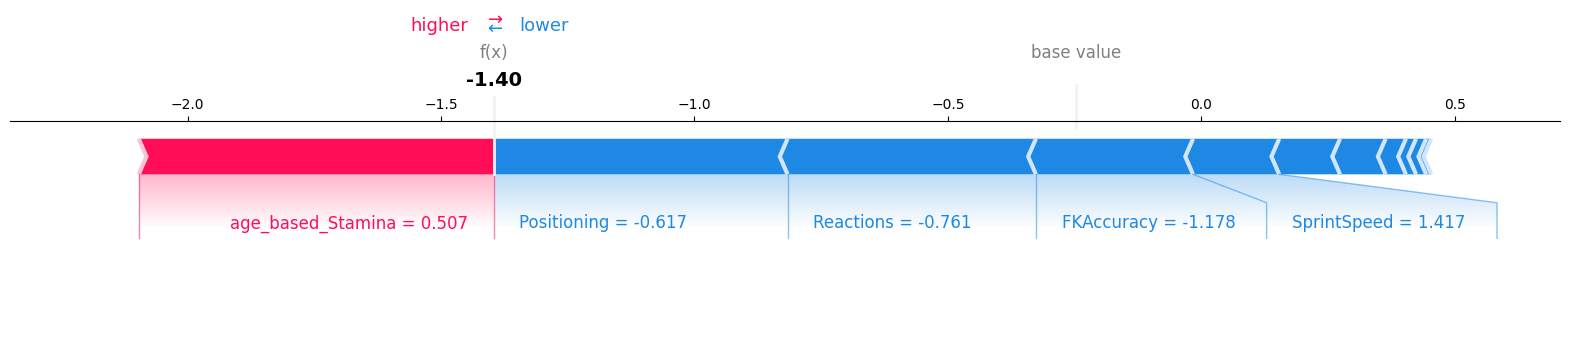

                  (256658, J. Ngankam, 2024)  shap
Reactions                               67.0 -0.49
age_based_Stamina                    4.31151  0.70
Positioning                             69.0 -0.58
FKAccuracy                              43.0 -0.31
ShortPassing                            65.0 -0.09
Dribbling                               75.0 -0.01
BallControl                             70.0 -0.02
ShotPower                               75.0 -0.04
Aggression                              67.0 -0.12
Vision                                  60.0 -0.02
SprintSpeed                             91.0 -0.17


First parameter to grid() is false, but line properties are supplied. The grid will be enabled.


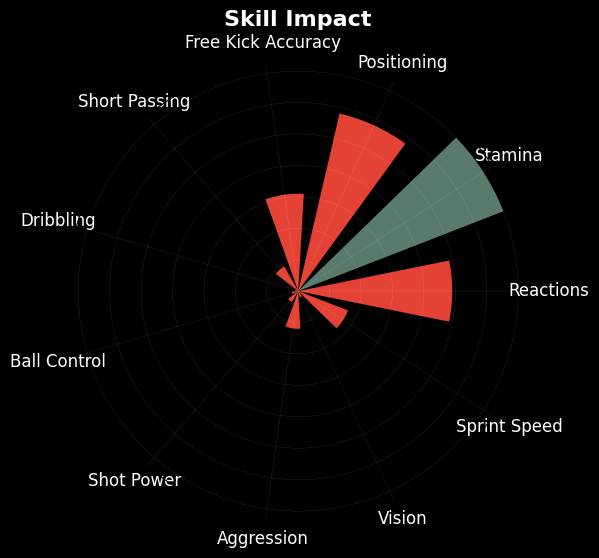

------------------------------------------------------------------------------------------------------------------------------------------------------
######################################################################################################################################################


In [138]:
from config import plot_feature_mapping

for ID in [101,266245,240833,251852,256658]:
    player = analyze_individual_ID(ID = ID	,df_raw=df_prospect,attributes=attributes,model = model,scaler=scaler)
    player.rename(index=plot_feature_mapping, inplace=True)
    create_polar_plot(player['shap'], positive_color= "#5a7b6c", negative_color='#e34234')
    
    print("-"*150)
    print("#"*150)

# Data Analysis

In [139]:
sql_prospect = f"""
SELECT * FROM  fifa WHERE Potential>84 and Age < 23  and overall <84
order by potential DESC;
"""

import pandas as pd
import sqlite3
DATABASE_PATH = "data/sport_analytics/database/football.db"
# Step 1: Establish a database connection
conn = sqlite3.connect(DATABASE_PATH)

df = pd.read_sql_query(sql_prospect, conn)

conn.close()
df = df.set_index(['ID','Name','FIFA'])
df.head()

Age  \
ID     Name          FIFA         
231747 K. Mbappé     2018  18.0   
230621 G. Donnarumma 2018  18.0   
                     2019  19.0   
242444 João Félix    2020  19.0   
                     2021  20.0   

                                                                      Photo  \
ID     Name          FIFA                                                     
231747 K. Mbappé     2018  https://cdn.sofifa.net/players/231/747/18_60.png   
230621 G. Donnarumma 2018  https://cdn.sofifa.net/players/230/621/18_60.png   
                     2019  https://cdn.sofifa.net/players/230/621/19_60.png   
242444 João Félix    2020  https://cdn.sofifa.net/players/242/444/20_60.png   
                     2021  https://cdn.sofifa.net/players/242/444/21_60.png   

                          Nationality                                 Flag  \
ID     Name          FIFA                                                    
231747 K. Mbappé     2018      France  https://cdn.sofifa.net/flags/fr.png   
230621 G. Donnarumma 2018       Italy  https://cdn.sofifa.net/flags/it.png   
                     2019       Italy  https://cdn.sofifa.net/flags/it.png   
242444 João Félix    2020    Portugal  https://cdn.sofifa.net/flags/pt.png   
                     2021    Portugal  https://cdn.sofifa.net/flags/pt.png   

                           Overall  Potential             Club  \
ID     Name          FIFA                                        
231747 K. Mbappé     2018     83.0       94.0           Monaco   
230621 G. Donnarumma 2018     82.0       94.0            Milan   
                     2019     82.0       93.0            Milan   
242444 João Félix    2020     80.0       93.0  Atlético Madrid   
                     2021     81.0       93.0  Atlético Madrid   

                                                              Club Logo  \
ID     Name          FIFA                                                 
231747 K. Mbappé     2018  https://cdn.sofifa.net/meta/team/6789/30.png   
230621 G. Donnarumma 2018   https://cdn.sofifa.net/meta/team/113/30.png   
                     2019   https://cdn.sofifa.net/meta/team/113/30.png   
242444 João Félix    2020  https://cdn.sofifa.net/meta/team/7980/30.png   
                     2021  https://cdn.sofifa.net/meta/team/7980/30.png   

                            Value  Wage  ...  Marking StandingTackle  \
ID     Name          FIFA                ...                           
231747 K. Mbappé     2018  €41.5M  €30K  ...     41.0           44.0   
230621 G. Donnarumma 2018  €28.5M  €30K  ...     12.0           14.0   
                     2019    €29M  €20K  ...     20.0           14.0   
242444 João Félix    2020    €28M  €38K  ...      NaN           42.0   
                     2021  €62.5M  €52K  ...      NaN           42.0   

                           SlidingTackle  GKDiving  GKHandling  GKKicking  \
ID     Name          FIFA                                                   
231747 K. Mbappé     2018           40.0      13.0         5.0        7.0   
230621 G. Donnarumma 2018           16.0      88.0        78.0       72.0   
                     2019           16.0      88.0        78.0       72.0   
242444 João Félix    2020           35.0      13.0        12.0       14.0   
                     2021           35.0      13.0        12.0       14.0   

                           GKPositioning  GKReflexes  Composure  \
ID     Name          FIFA                                         
231747 K. Mbappé     2018           11.0         6.0       80.0   
230621 G. Donnarumma 2018           78.0        88.0       68.0   
                     2019           78.0        88.0       68.0   
242444 João Félix    2020           13.0        14.0       82.0   
                     2021           13.0        14.0       82.0   

                           Defensive awareness  
ID     Name          FIFA                       
231747 K. Mbappé     2018                  NaN  
230621 G. Donnarumma 2018     

In [140]:
features = list(set(model.feature_names_in_).intersection(df.columns))

In [141]:
model.feature_names_in_

array(['Reactions', 'age_based_Stamina', 'Positioning', 'FKAccuracy',
       'ShortPassing', 'Dribbling', 'BallControl', 'ShotPower',
       'Aggression', 'Vision', 'SprintSpeed'], dtype='<U17')

In [142]:
df[df.index.get_level_values('ID')==240833][features]

Positioning  SprintSpeed  BallControl  Aggression  \
ID     Name       FIFA                                                      
240833 Y. Moukoko 2023         67.0         86.0         75.0        43.0   
                  2024         78.0         79.0         81.0        52.0   

                        ShortPassing  Reactions  Dribbling  ShotPower  \
ID     Name       FIFA                                                  
240833 Y. Moukoko 2023          64.0       62.0       78.0       65.0   
                  2024          71.0       77.0       79.0       78.0   

                        FKAccuracy  Vision  
ID     Name       FIFA                      
240833 Y. Moukoko 2023        39.0    59.0  
                  2024        42.0    59.0